In [1]:
import cv2
import numpy as np

#YOLO
net = cv2.dnn.readNet("YOLO/yolov4-tiny-custom_final.weights","YOLO/yolov4-tiny-custom.cfg")
classes = []
with open("YOLO/classes.names","r") as f:
    classes = [line.strip() for line in f.readlines()]

In [2]:
layer_names = net.getLayerNames()
outputlayers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

In [12]:

#image
img = cv2.imread("DemoBilder/albi3.jpeg")
img = cv2.resize(img,None,fx=0.4,fy=0.3)
height,width,channels = img.shape

In [13]:
COLORS = [(0, 255, 0), (0, 0, 255), (255, 0, 0),(255, 255, 0), (255, 0, 255), (0, 255, 255)]

STATUEN = "YOLO/classes.names"


class_name = []
with open(STATUEN, 'rt') as f:
    class_name = f.read().rstrip('\n').split('\n')

Conf_threshold = 0.80
NMS_threshold = 0.2

model = cv2.dnn_DetectionModel(net)
model.setInputParams(size=(416, 416), scale=1/255, swapRB=True)


classes, scores, boxes = model.detect(img, Conf_threshold, NMS_threshold)
for (classid, score, box) in zip(classes, scores, boxes):
    color = COLORS[int(classid) % len(COLORS)]
    label = "%s : %f" % (class_name[classid[0]], score)
    cv2.rectangle(img, box, color, 1)
    cv2.putText(img, label, (box[0], box[1]-10),
    cv2.FONT_HERSHEY_COMPLEX, 0.5, color, 1)

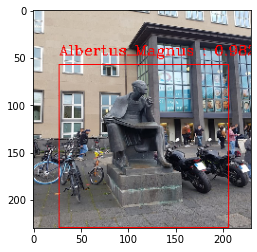

In [14]:
from matplotlib import pyplot as plt
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [15]:
print(label)

Albertus_Magnus : 0.982940
